In [ ]:
import pandas as pd
df=pd.read_csv('/content/combined_real_estate_prices_1995_2024.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year                     30 non-null     datetime64[ns]
 1   France Price per m² (€)  30 non-null     int64         
 2   Paris Price per m² (€)   30 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 848.0 bytes


In [ ]:
df['Year']=pd.to_datetime(df.Year,format='%Y')

In [ ]:
df.head()

,Year,France Price per m² (€),Paris Price per m² (€)
0,1970-01-01 00:00:00.000001995,1056,2940
1,1970-01-01 00:00:00.000001996,1046,2780
2,1970-01-01 00:00:00.000001997,1063,2640
3,1970-01-01 00:00:00.000001998,1091,2630
4,1970-01-01 00:00:00.000001999,1119,2820


In [ ]:
print(df[df.Rendement_nvidia.isnull()])

Empty DataFrame
Columns: [Date, Rendement_Bitcoin, Rendement_gold, Rendement_nvidia]
Index: []


In [ ]:
!pip install plotly

V1

In [ ]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assurez-vous d'avoir un DataFrame df avec les colonnes 'Date', 'Rendement_Bitcoin', 'Rendement_gold', et 'Rendement_nvidia'

# # Préparer les données pour l'animation
# x_data = df['Date']
# y_data_bitcoin = df['Rendement_Bitcoin']
# y_data_gold = df['Rendement_gold']
# y_data_nvidia = df['Rendement_nvidia']

# # Calculer la période de six mois
# six_months = pd.Timedelta(days=30*6)
# end_initial_period = x_data.min() + six_months

# # Créer la figure et les axes
# fig, ax = plt.subplots(figsize=(10, 6))  # Ajuster la taille de la figure
# line_bitcoin, = ax.plot([], [], label='Bitcoin', lw=2, color='#f7931a')  # Couleur Bitcoin (orange)
# line_gold, = ax.plot([], [], label='Gold', lw=2, color='gold')  # Couleur Or
# line_nvidia, = ax.plot([], [], label='Nvidia', lw=2, color='green')  # Couleur Nvidia (vert)

# # Enlever les cadres en haut et à gauche
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # Créer les cercles pour représenter les marqueurs
# circle_bitcoin = plt.Circle((0, 0), 0.6, color='#f7931a', fill=True)  # Réduire la taille des cercles de moitié
# circle_gold = plt.Circle((0, 0), 0.6, color='gold', fill=True)
# circle_nvidia = plt.Circle((0, 0), 0.6, color='green', fill=True)

# # Ajouter les cercles aux axes
# ax.add_patch(circle_bitcoin)
# ax.add_patch(circle_gold)
# ax.add_patch(circle_nvidia)

# # Créer les annotations de pourcentage (initialisées vides)
# text_bitcoin = ax.text(0, 0, '', ha='left', va='center', color='#f7931a')  # Match color with line
# text_gold = ax.text(0, 0, '', ha='left', va='center', color='gold')
# text_nvidia = ax.text(0, 0, '', ha='left', va='center', color='green')

# # Créer l'annotation pour la date
# date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12, color='black')

# # Initialiser la fonction pour la configuration de l'animation
# def init():
#     line_bitcoin.set_data([], [])
#     line_gold.set_data([], [])
#     line_nvidia.set_data([], [])
#     ax.set_xlim(x_data.min(), end_initial_period)  # Initialiser avec les six premiers mois
#     ax.set_ylim(min(y_data_bitcoin.min(), y_data_gold.min(), y_data_nvidia.min()) - 1,
#                 max(y_data_bitcoin.max(), y_data_gold.max(), y_data_nvidia.max()) + 1)
#     date_text.set_text('')
#     return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# # Fonction pour mettre à jour l'animation
# def update(frame):
#     x = x_data[:frame]
#     y_bitcoin = y_data_bitcoin[:frame]
#     y_gold = y_data_gold[:frame]
#     y_nvidia = y_data_nvidia[:frame]

#     line_bitcoin.set_data(x, y_bitcoin)
#     line_gold.set_data(x, y_gold)
#     line_nvidia.set_data(x, y_nvidia)

#     if frame > 0:
#         circle_bitcoin.set_center((x[frame - 1], y_bitcoin[frame - 1]))
#         circle_gold.set_center((x[frame - 1], y_gold[frame - 1]))
#         circle_nvidia.set_center((x[frame - 1], y_nvidia[frame - 1]))

#         # Mettre à jour les annotations de valeurs à droite des cercles
#         text_bitcoin.set_position((x[frame - 1] + pd.Timedelta(days=5), y_bitcoin[frame - 1]))
#         text_gold.set_position((x[frame - 1] + pd.Timedelta(days=5), y_gold[frame - 1]))
#         text_nvidia.set_position((x[frame - 1] + pd.Timedelta(days=5), y_nvidia[frame - 1]))

#         text_bitcoin.set_text(f'Bitcoin {y_bitcoin[frame-1]:.2f}%')
#         text_gold.set_text(f'Or {y_gold[frame-1]:.2f}%')
#         text_nvidia.set_text(f'Nvidia {y_nvidia[frame-1]:.2f}%')

#     # Mettre à jour le texte de la date
#     if len(x) > 0:
#         date_text.set_text(f'Date: {x[frame - 1].strftime("%Y-%m-%d")}')
#         if x[frame - 1] > end_initial_period:
#             ax.set_xlim(x_data.min(), x_data[:frame].max() + pd.Timedelta(days=30))  # Ajouter une marge à droite après les six premiers mois
#         ax.set_ylim(min(y_bitcoin.min(), y_gold.min(), y_nvidia.min()) - 1,
#                     max(y_bitcoin.max(), y_gold.max(), y_nvidia.max()) + 1)
#     return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# # Créer l'animation avec des ajustements supplémentaires pour la fluidité
# ani = FuncAnimation(fig, update, frames=len(x_data), init_func=init, blit=True, interval=10, repeat=False)

# # Enregistrer l'animation en tant que fichier vidéo
# ani.save('rendements.mp4', writer='ffmpeg')

# # Afficher l'animation dans le notebook
# HTML('<video controls src="rendements.mp4" type="video/mp4">')


**V2 (décalage de 100 jours sur début de vidéo)texte en gras**

In [ ]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assurez-vous d'avoir un DataFrame df avec les colonnes 'Date', 'Rendement_Bitcoin', 'Rendement_gold', et 'Rendement_nvidia'

# # Préparer les données pour l'animation
# x_data = df['Date']
# y_data_bitcoin = df['Rendement_Bitcoin']
# y_data_gold = df['Rendement_gold']
# y_data_nvidia = df['Rendement_nvidia']

# # Calculer la période de six mois
# six_months = pd.Timedelta(days=30*6)
# end_initial_period = x_data.min() + six_months

# # Créer la figure et les axes
# fig, ax = plt.subplots(figsize=(6, 6))  # Ajuster la taille de la figure
# line_bitcoin, = ax.plot([], [], label='Bitcoin', lw=2, color='#f7931a')  # Couleur Bitcoin (orange)
# line_gold, = ax.plot([], [], label='Gold', lw=2, color='gold')  # Couleur Or
# line_nvidia, = ax.plot([], [], label='Nvidia', lw=2, color='green')  # Couleur Nvidia (vert)

# # Enlever les cadres en haut et à gauche
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # Créer les cercles pour représenter les marqueurs
# circle_bitcoin = plt.Circle((0, 0), 0.6, color='#f7931a', fill=True)  # Réduire la taille des cercles de moitié
# circle_gold = plt.Circle((0, 0), 0.6, color='gold', fill=True)
# circle_nvidia = plt.Circle((0, 0), 0.6, color='green', fill=True)

# # Ajouter les cercles aux axes
# ax.add_patch(circle_bitcoin)
# ax.add_patch(circle_gold)
# ax.add_patch(circle_nvidia)

# # Créer les annotations de pourcentage (initialisées vides)
# text_bitcoin = ax.text(0, 0, '', ha='left', va='center', color='#f7931a')  # Match color with line
# text_gold = ax.text(0, 0, '', ha='left', va='center', color='gold')
# text_nvidia = ax.text(0, 0, '', ha='left', va='center', color='green')

# # Créer l'annotation pour la date
# date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12, color='black')

# # Initialiser la fonction pour la configuration de l'animation
# def init():
#     # Initialiser avec les 100 premiers jours
#     line_bitcoin.set_data(x_data[:100], y_data_bitcoin[:100])
#     line_gold.set_data(x_data[:100], y_data_gold[:100])
#     line_nvidia.set_data(x_data[:100], y_data_nvidia[:100])

#     circle_bitcoin.set_center((x_data[99], y_data_bitcoin[99]))
#     circle_gold.set_center((x_data[99], y_data_gold[99]))
#     circle_nvidia.set_center((x_data[99], y_data_nvidia[99]))

#     text_bitcoin.set_position((x_data[99] + pd.Timedelta(days=5), y_data_bitcoin[99]))
#     text_gold.set_position((x_data[99] + pd.Timedelta(days=5), y_data_gold[99]))
#     text_nvidia.set_position((x_data[99] + pd.Timedelta(days=5), y_data_nvidia[99]))

#     text_bitcoin.set_text(f'Bitcoin {y_data_bitcoin[99]:.2f}%')
#     text_gold.set_text(f'Or {y_data_gold[99]:.2f}%')
#     text_nvidia.set_text(f'Nvidia {y_data_nvidia[99]:.2f}%')

#     ax.set_xlim(x_data.min(), end_initial_period)  # Initialiser avec les six premiers mois
#     ax.set_ylim(min(y_data_bitcoin.min(), y_data_gold.min(), y_data_nvidia.min()) - 1,
#                 max(y_data_bitcoin.max(), y_data_gold.max(), y_data_nvidia.max()) + 1)
#     date_text.set_text(f'Date: {x_data[99].strftime("%Y-%m-%d")}')

#     return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# # Fonction pour mettre à jour l'animation
# def update(frame):
#     frame += 100  # Commencer à partir du 101e jour
#     x = x_data[:frame]
#     y_bitcoin = y_data_bitcoin[:frame]
#     y_gold = y_data_gold[:frame]
#     y_nvidia = y_data_nvidia[:frame]

#     line_bitcoin.set_data(x, y_bitcoin)
#     line_gold.set_data(x, y_gold)
#     line_nvidia.set_data(x, y_nvidia)

#     if frame > 100:
#         circle_bitcoin.set_center((x[frame - 1], y_bitcoin[frame - 1]))
#         circle_gold.set_center((x[frame - 1], y_gold[frame - 1]))
#         circle_nvidia.set_center((x[frame - 1], y_nvidia[frame - 1]))

#         # Mettre à jour les annotations de valeurs à droite des cercles toutes les 4 frames
#         if frame % 4 == 0:
#             text_bitcoin.set_position((x[frame - 1] + pd.Timedelta(days=5), y_bitcoin[frame - 1]))
#             text_gold.set_position((x[frame - 1] + pd.Timedelta(days=5), y_gold[frame - 1]))
#             text_nvidia.set_position((x[frame - 1] + pd.Timedelta(days=5), y_nvidia[frame - 1]))

#             text_bitcoin.set_text(f'Bitcoin {y_bitcoin[frame-1]:.2f}%')
#             text_gold.set_text(f'Or {y_gold[frame-1]:.2f}%')
#             text_nvidia.set_text(f'Nvidia {y_nvidia[frame-1]:.2f}%')

#     # Mettre à jour le texte de la date
#     if len(x) > 0:
#         date_text.set_text(f'Date: {x[frame - 1].strftime("%Y-%m-%d")}')
#         if x[frame - 1] > end_initial_period:
#             ax.set_xlim(x_data.min(), x_data[:frame].max() + pd.Timedelta(days=30))  # Ajouter une marge à droite après les six premiers mois
#         ax.set_ylim(min(y_bitcoin.min(), y_gold.min(), y_nvidia.min()) - 1,
#                     max(y_bitcoin.max(), y_gold.max(), y_nvidia.max()) + 1)
#     return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# # Créer l'animation avec des ajustements supplémentaires pour la fluidité
# ani = FuncAnimation(fig, update, frames=len(x_data) - 100, init_func=init, blit=True, interval=15, repeat=False)

# # Enregistrer l'animation en tant que fichier vidéo
# ani.save('rendements.mp4', writer='ffmpeg')

# # Afficher l'animation dans le notebook
# HTML('<video controls src="rendements.mp4" type="video/mp4">')


**V3 ajout du fond**

In [ ]:
# from matplotlib.animation import FuncAnimation
# from IPython.display import HTML
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import matplotlib.dates as mdates

# # Assurez-vous d'avoir un DataFrame df avec les colonnes 'Date', 'Rendement_Bitcoin', 'Rendement_gold', et 'Rendement_nvidia'

# # Préparer les données pour l'animation
# df['Date'] = pd.to_datetime(df['Date'])  # Assurez-vous que les dates sont au format datetime
# x_data = df['Date'].values.astype('datetime64[D]')
# y_data_bitcoin = df['Rendement_Bitcoin']
# y_data_gold = df['Rendement_gold']
# y_data_nvidia = df['Rendement_nvidia']

# # Calculer la période de six mois
# six_months = np.timedelta64(180, 'D')  # Approximation de 6 mois en jours
# end_initial_period = x_data.min() + six_months

# # Créer la figure et les axes
# fig, ax = plt.subplots(figsize=(8, 8))  # Ajuster la taille de la figure

# # Enlever les cadres en haut et à gauche
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # Charger l'image de fond
# background_img = plt.imread('/content/BG (1).png')

# # Afficher l'image de fond couvrant toute la figure
# fig.figimage(background_img, xo=0, yo=0, alpha=1, zorder=-1)

# # Rendre le fond de la figure et des axes transparent
# fig.patch.set_alpha(0)
# ax.patch.set_alpha(0)

# # Mettre les axes en blanc
# ax.spines['left'].set_color('white')
# ax.spines['bottom'].set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# ax.yaxis.label.set_color('white')
# ax.xaxis.label.set_color('white')

# # Configurer l'axe x pour afficher uniquement les années
# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# # Couleurs plus vives
# bitcoin_color = '#FFA500'  # Couleur Bitcoin (orange vif)
# gold_color = '#FFD700'  # Couleur Or (jaune vif)
# nvidia_color = '#00FF00'  # Couleur Nvidia (vert vif)

# # Créer les lignes de données
# line_bitcoin, = ax.plot([], [], label='Bitcoin', lw=2, color=bitcoin_color, zorder=1)
# line_gold, = ax.plot([], [], label='Gold', lw=2, color=gold_color, zorder=1)
# line_nvidia, = ax.plot([], [], label='Nvidia', lw=2, color=nvidia_color, zorder=1)

# # Créer les cercles pour représenter les marqueurs
# circle_bitcoin = plt.Circle((0, 0), 0.6, color=bitcoin_color, fill=True, zorder=2)
# circle_gold = plt.Circle((0, 0), 0.6, color=gold_color, fill=True, zorder=2)
# circle_nvidia = plt.Circle((0, 0), 0.6, color=nvidia_color, fill=True, zorder=2)

# # Ajouter les cercles aux axes
# ax.add_patch(circle_bitcoin)
# ax.add_patch(circle_gold)
# ax.add_patch(circle_nvidia)

# # Créer les annotations de pourcentage (initialisées vides)
# text_bitcoin = ax.text(0, 0, '', ha='left', va='center', color=bitcoin_color, zorder=3)
# text_gold = ax.text(0, 0, '', ha='left', va='center', color=gold_color, zorder=3)
# text_nvidia = ax.text(0, 0, '', ha='left', va='center', color=nvidia_color, zorder=3)

# # Créer l'annotation pour la date
# date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12, color='white', zorder=3)

# # Initialiser la fonction pour la configuration de l'animation
# def init():
#     # Initialiser avec les 100 premiers jours
#     line_bitcoin.set_data(x_data[:100], y_data_bitcoin[:100])
#     line_gold.set_data(x_data[:100], y_data_gold[:100])
#     line_nvidia.set_data(x_data[:100], y_data_nvidia[:100])

#     circle_bitcoin.set_center((x_data[99], y_data_bitcoin[99]))
#     circle_gold.set_center((x_data[99], y_data_gold[99]))
#     circle_nvidia.set_center((x_data[99], y_data_nvidia[99]))

#     text_bitcoin.set_position((x_data[99] + np.timedelta64(5, 'D'), y_data_bitcoin[99]))
#     text_gold.set_position((x_data[99] + np.timedelta64(5, 'D'), y_data_gold[99]))
#     text_nvidia.set_position((x_data[99] + np.timedelta64(5, 'D'), y_data_nvidia[99]))

#     text_bitcoin.set_text(f'Bitcoin {y_data_bitcoin[99]:.2f}%')
#     text_gold.set_text(f'Or {y_data_gold[99]:.2f}%')
#     text_nvidia.set_text(f'Nvidia {y_data_nvidia[99]:.2f}%')

#     ax.set_xlim(x_data.min(), end_initial_period + np.timedelta64(120, 'D'))  # Ajouter une marge à droite
#     ax.set_ylim(min(y_data_bitcoin.min(), y_data_gold.min(), y_data_nvidia.min()) - 1,
#                 max(y_data_bitcoin.max(), y_data_gold.max(), y_data_nvidia.max()) + 1)
#     date_text.set_text(f'Date: {pd.to_datetime(x_data[99]).strftime("%Y-%m-%d")}')

#     return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# # Fonction pour mettre à jour l'animation
# def update(frame):
#     frame += 100  # Commencer à partir du 101e jour
#     x = x_data[:frame]
#     y_bitcoin = y_data_bitcoin[:frame]
#     y_gold = y_data_gold[:frame]
#     y_nvidia = y_data_nvidia[:frame]

#     line_bitcoin.set_data(x, y_bitcoin)
#     line_gold.set_data(x, y_gold)
#     line_nvidia.set_data(x, y_nvidia)

#     if frame > 100:
#         circle_bitcoin.set_center((x[frame - 1], y_bitcoin[frame - 1]))
#         circle_gold.set_center((x[frame - 1], y_gold[frame - 1]))
#         circle_nvidia.set_center((x[frame - 1], y_nvidia[frame - 1]))

#         # Mettre à jour les annotations de valeurs à droite des cercles toutes les 4 frames
#         if frame % 5 == 0:
#             text_bitcoin.set_position((x[frame - 1] + np.timedelta64(5, 'D'), y_bitcoin[frame - 1]))
#             text_gold.set_position((x[frame - 1] + np.timedelta64(5, 'D'), y_gold[frame - 1]))
#             text_nvidia.set_position((x[frame - 1] + np.timedelta64(5, 'D'), y_nvidia[frame - 1]))

#             text_bitcoin.set_text(f'Bitcoin {y_bitcoin[frame-1]:.2f}%')
#             text_gold.set_text(f'Or {y_gold[frame-1]:.2f}%')
#             text_nvidia.set_text(f'Nvidia {y_nvidia[frame-1]:.2f}%')

#     # Mettre à jour le texte de la date
#     if len(x) > 0:
#         date_text.set_text(f'Date: {pd.to_datetime(x[frame - 1]).strftime("%Y-%m-%d")}')
#         if x[frame - 1] > end_initial_period:
#             ax.set_xlim(x_data.min(), x_data[:frame].max() + np.timedelta64(120, 'D'))  # Ajouter une marge fixe à droite
#         ax.set_ylim(min(y_bitcoin.min(), y_gold.min(), y_nvidia.min()) - 1,
#                     max(y_bitcoin.max(), y_gold.max(), y_nvidia.max()) + 1)
#     return line_bitcoin, line_gold, line_nvidia, circle_bitcoin, circle_gold, circle_nvidia, text_bitcoin, text_gold, text_nvidia, date_text

# # Créer l'animation avec des ajustements supplémentaires pour la fluidité
# ani = FuncAnimation(fig, update, frames=len(x_data) - 100, init_func=init, blit=True, interval=15, repeat=False)

# # Enregistrer l'animation en tant que fichier vidéo
# ani.save('rendements.mp4', writer='ffmpeg')

# # Afficher l'animation dans le notebook
# HTML('<video controls src="rendements.mp4" type="video/mp4">')


**TEST**

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates


# Préparer les données pour l'animation
df['Date'] = pd.to_datetime(df['Year'])  # Assurez-vous que les dates sont au format datetime
x_data = df['Date'].values.astype('datetime64[D]')
y_data_france = df['France Price per m² (€)']
y_data_paris = df['Paris Price per m² (€)']


# Appliquer le filtre Savitzky-Golay
window_length = 11  # Doit être un entier impair
polyorder = 2  # Ordre du polynôme utilisé pour le lissage

# y_data_bitcoin_smooth = savgol_filter(y_data_bitcoin, window_length, polyorder)
# y_data_gold_smooth = savgol_filter(y_data_gold, window_length, polyorder)
# y_data_nvidia_smooth = savgol_filter(y_data_nvidia, window_length, polyorder)

# Calculer la période de six ans
six_years = np.timedelta64(6, 'Y')  # Approximation de 6 ANS
end_initial_period = x_data.min() + six_years

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 8))  # Ajuster la taille de la figure

# Enlever les cadres en haut et à gauche
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# # Charger l'image de fond
# background_img = plt.imread('/content/BG (1).png')

# # Afficher l'image de fond couvrant toute la figure
# fig.figimage(background_img, xo=0, yo=0, alpha=1, zorder=-1)

# Rendre le fond de la figure et des axes transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# # Mettre les axes en blanc
# ax.spines['left'].set_color('white')
# ax.spines['bottom'].set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# ax.yaxis.label.set_color('white')
# ax.xaxis.label.set_color('white')

# Configurer l'axe x pour afficher uniquement les années
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs plus vives
france_color = '#FF0000'  # Couleur Bitcoin (rouge vif)
paris_color = '#FFFF00'  # Couleur Or (jaune pur)


# Créer les lignes de données
line_france, = ax.plot([], [], label='France', lw=2, color=france_color, zorder=1)
line_paris, = ax.plot([], [], label='Paris', lw=2, color=paris_color, zorder=1)


# Créer les cercles pour représenter les marqueurs
circle_france = plt.Circle((0, 0), 0.6, color=france_color, fill=True, zorder=2)
circle_paris = plt.Circle((0, 0), 0.6, color=paris_color, fill=True, zorder=2)


# Ajouter les cercles aux axes
ax.add_patch(circle_france)
ax.add_patch(circle_paris)


# Créer les annotations de pourcentage (initialisées vides)
text_france = ax.text(0, 0, '', ha='left', va='center', color=france_color, zorder=3)
text_paris = ax.text(0, 0, '', ha='left', va='center', color=paris_color, zorder=3)


# Créer l'annotation pour la date
date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=12, color='white', zorder=3)

# # Ajouter le titre et le sous-titre
# plt.title('Or vs Bitcoin vs Nvidia', fontsize=24, color='#00EFA2', pad=40)
# plt.text(0.5, 1.05, 'Evolution du cours depuis le 1er Janvier 2020',
#          transform=ax.transAxes, ha='center', va='top', fontsize=16, color='#00EFA2')


# Initialiser la fonction pour la configuration de l'animation
def init():
    # Initialiser avec les 100 premiers jours
    line_france.set_data(x_data, y_data_france)
    line_paris.set_data(x_data, y_data_paris)


    circle_france.set_center((x_data, y_data_france))
    circle_paris.set_center((x_data, y_data_paris))


    text_france.set_position((x_data , y_data_france))
    text_paris.set_position((x_data , y_data_paris))

    text_france.set_text(f'France {y_data_france:.2f}€')
    text_paris.set_text(f'Paris {y_data_paris:.2f}€')


    ax.set_xlim(x_data.min(), end_initial_period )  # Ajouter une marge à droite
    ax.set_ylim(min(y_data_france.min(), y_data_paris.min()) - 1,
                max(y_data_france.max(), y_data_paris.max()) + 1)
    date_text.set_text(f'Date: {pd.to_datetime(x_data).strftime("%Y")}')

    return line_france, line_paris, circle_france, circle_paris,text_france, text_paris, date_text

# Fonction pour mettre à jour l'animation
def update(frame):

    x = x_data[:frame]
    y_france = y_data_france[:frame]
    y_paris = y_data_paris[:frame]


    line_france.set_data(x, y_france)
    line_paris.set_data(x, y_paris)


    if frame > 1:
        circle_france.set_center((x[frame - 1], y_france[frame - 1]))
        circle_paris.set_center((x[frame - 1], y_paris[frame - 1]))


        text_france.set_position((x[frame - 1], y_france[frame - 1]))
        text_paris.set_position((x[frame - 1], y_paris[frame - 1]))


        text_france.set_text(f'France{y_france[frame-1]:.2f}€')
        text_paris.set_text(f'Paris {y_paris[frame-1]:.2f}€')


    # Mettre à jour le texte de la date
    if len(x) > 0:
        date_text.set_text(f'Date: {pd.to_datetime(x[frame - 1]).strftime("%Y")}')
        if x[frame - 1] > end_initial_period:
            ax.set_xlim(x_data.min(), x_data[:frame].max() + np.timedelta64(6, 'Y'))  # Ajouter une marge fixe à droite
        ax.set_ylim(min(y_france.min(), y_paris.min()) - 1,
                    max(y_france.max(), y_paris.max()) + 1)
    return line_france, line_paris, circle_france, circle_paris, text_france, text_paris, date_text

# Créer l'animation avec des ajustements supplémentaires pour la fluidité
ani = FuncAnimation(fig, update, frames=len(x_data) - 6, init_func=init, blit=True, interval=15, repeat=False)

# Enregistrer l'animation en tant que fichier vidéo
ani.save('rendements.mp4', writer='ffmpeg')

# Afficher l'animation dans le notebook
HTML('<video controls src="rendements.mp4" type="video/mp4">')


UFuncTypeError: Cannot cast ufunc 'add' input 1 from dtype('<m8[Y]') to dtype('<m8[D]') with casting rule 'same_kind'

In [1]:
import pandas as pd
df=pd.read_csv('/content/combined_real_estate_prices_1995_2024.csv')

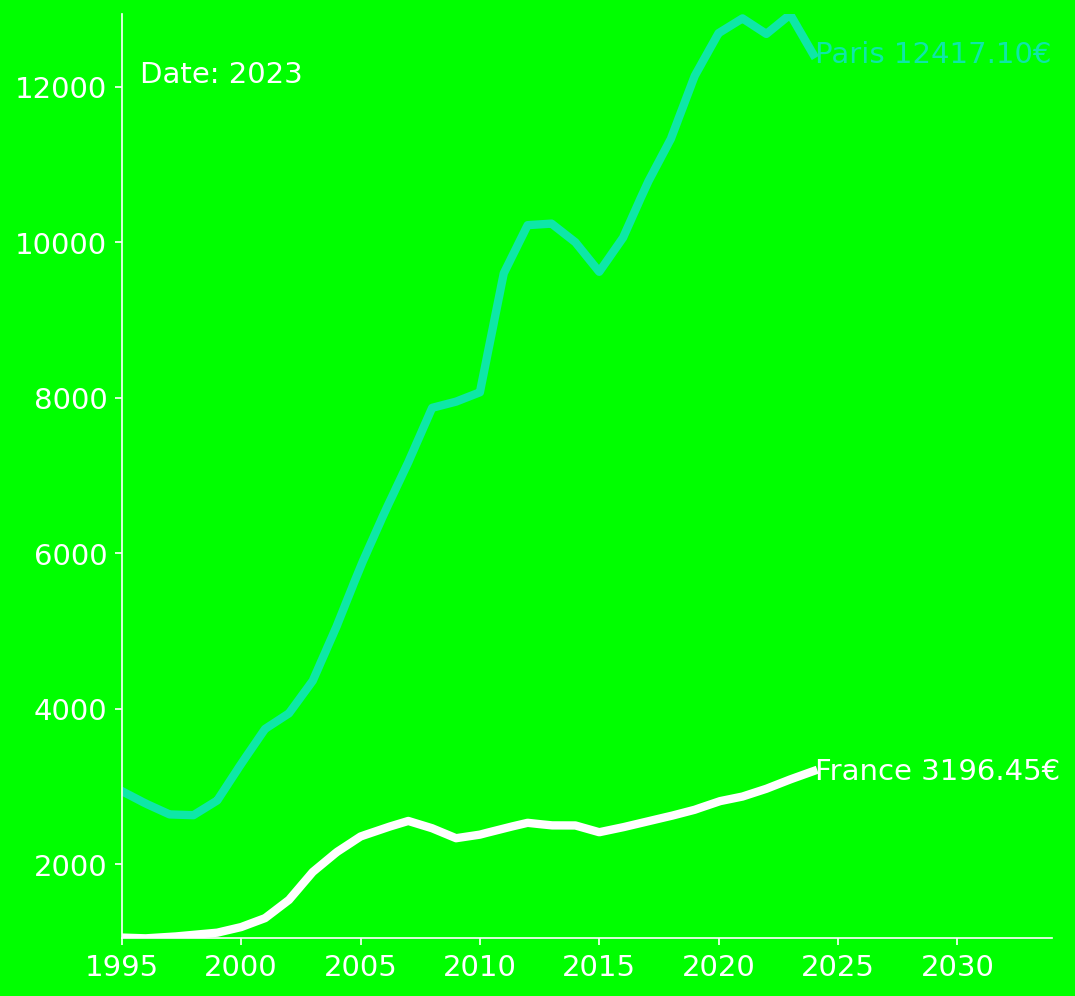

In [6]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.dates as mdates



# Convertir la colonne 'Year' en datetime format
df['Year'] = df['Year'].astype(str)
df['Date'] = pd.to_datetime(df['Year'] + '-01-01')

x_data = df['Date'].values.astype('datetime64[D]')
y_data_france = df['France Price per m² (€)'].values
y_data_paris = df['Paris Price per m² (€)'].values

# Nombre de frames pour une animation de 15 secondes à 60 fps
total_frames = 15 * 60

# Interpoler les données pour obtenir plus de frames
time_interp = np.linspace(0, len(x_data) - 1, total_frames)
x_interp = np.interp(time_interp, np.arange(len(x_data)), x_data.astype(np.int64)).astype('datetime64[D]')
y_france_interp = np.interp(time_interp, np.arange(len(y_data_france)), y_data_france)
y_paris_interp = np.interp(time_interp, np.arange(len(y_data_paris)), y_data_paris)

# Calculer la période de six ans avec précision jour
six_years = np.timedelta64(6 * 365, 'D')  # Approximation de 6 ans en jours
end_initial_period = x_interp.min() + six_years

# Créer la figure et les axes avec une résolution élevée pour éviter la pixellisation
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)  # Ajuster la taille et la résolution de la figure

# Définir le fond vert pour la figure et les axes
fig.patch.set_facecolor('#00FF00')
ax.set_facecolor('#00FF00')

# Enlever les cadres en haut et à droite
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Configurer l'axe x pour afficher uniquement les années tous les 5 ans
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Couleurs plus vives
france_color = 'white'  # blanc
paris_color = '#0EE7A8'  # bleu neige

# Définir la couleur des axes et des étiquettes en blanc
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', colors='white', labelsize=14)
ax.tick_params(axis='y', colors='white', labelsize=14)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# Créer les lignes de données
line_france, = ax.plot([], [], label='France', lw=4, color=france_color, zorder=1)  # Épaisseur augmentée à 4
line_paris, = ax.plot([], [], label='Paris', lw=4, color=paris_color, zorder=1)    # Épaisseur augmentée à 4

# Créer les cercles pour représenter les marqueurs
circle_france = plt.Circle((0, 0), 0.8, color=france_color, fill=True, zorder=2)  # Taille augmentée
circle_paris = plt.Circle((0, 0), 0.8, color=paris_color, fill=True, zorder=2)  # Taille augmentée

# Ajouter les cercles aux axes
ax.add_patch(circle_france)
ax.add_patch(circle_paris)

# Créer les annotations de pourcentage (initialisées vides)
text_france = ax.text(0, 0, '', ha='left', va='center', fontsize=14, color=france_color, zorder=3)  # Taille augmentée
text_paris = ax.text(0, 0, '', ha='left', va='center', fontsize=14, color=paris_color, zorder=3)  # Taille augmentée

# Créer l'annotation pour la date
date_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, ha='left', va='top', fontsize=14, color='white', zorder=3)  # Taille augmentée

# Initialiser la fonction pour la configuration de l'animation
def init():
    # Initialiser avec les trois premières années
    initial_index = np.searchsorted(x_interp, x_data[2])
    line_france.set_data(x_interp[:initial_index + 1], y_france_interp[:initial_index + 1])
    line_paris.set_data(x_interp[:initial_index + 1], y_paris_interp[:initial_index + 1])

    circle_france.set_center((x_interp[initial_index], y_france_interp[initial_index]))
    circle_paris.set_center((x_interp[initial_index], y_paris_interp[initial_index]))

    text_france.set_position((x_interp[initial_index] + np.timedelta64(30, 'D'), y_france_interp[initial_index]))  # Décalage à droite
    text_paris.set_position((x_interp[initial_index] + np.timedelta64(30, 'D'), y_paris_interp[initial_index]))  # Décalage à droite

    text_france.set_text(f'France {y_france_interp[initial_index]:.2f}€')
    text_paris.set_text(f'Paris {y_paris_interp[initial_index]:.2f}€')

    ax.set_xlim(x_interp.min(), end_initial_period + np.timedelta64(3650, 'D'))  # Ajouter une marge plus grande à droite (10 ans)
    ax.set_ylim(min(y_france_interp.min(), y_paris_interp.min()) - 1,
                max(y_france_interp.max(), y_paris_interp.max()) + 1)
    date_text.set_text(f'Date: {pd.to_datetime(x_interp[initial_index]).strftime("%Y")}')

    return line_france, line_paris, circle_france, circle_paris, text_france, text_paris, date_text

# Fonction pour mettre à jour l'animation
def update(frame):
    initial_index = np.searchsorted(x_interp, x_data[2])
    x = x_interp[:initial_index + frame]
    y_france = y_france_interp[:initial_index + frame]
    y_paris = y_paris_interp[:initial_index + frame]

    line_france.set_data(x, y_france)
    line_paris.set_data(x, y_paris)

    if frame > 1:
        circle_france.set_center((x[initial_index + frame - 1], y_france[initial_index + frame - 1]))
        circle_paris.set_center((x[initial_index + frame - 1], y_paris[initial_index + frame - 1]))

        text_france.set_position((x[initial_index + frame - 1] + np.timedelta64(30, 'D'), y_france[initial_index + frame - 1]))  # Décalage à droite
        text_paris.set_position((x[initial_index + frame - 1] + np.timedelta64(30, 'D'), y_paris[initial_index + frame - 1]))  # Décalage à droite

        text_france.set_text(f'France {y_france[initial_index + frame - 1]:.2f}€')
        text_paris.set_text(f'Paris {y_paris[initial_index + frame - 1]:.2f}€')

    # Mettre à jour le texte de la date
    if len(x) > 0:
        date_text.set_text(f'Date: {pd.to_datetime(x[initial_index + frame - 1]).strftime("%Y")}')
        if x[initial_index + frame - 1] > end_initial_period:
            ax.set_xlim(x_interp.min(), x_interp[:initial_index + frame].max() + np.timedelta64(3650, 'D'))  # Ajouter une marge plus grande à droite (10 ans)
        ax.set_ylim(min(y_france_interp.min(), y_paris_interp.min()) - 1,
                    max(y_france_interp.max(), y_paris_interp.max()) + 1)
    return line_france, line_paris, circle_france, circle_paris, text_france, text_paris, date_text

# Créer l'animation avec 60 images par seconde (interval=1000/60 millisecondes)
ani = FuncAnimation(fig, update, frames=total_frames - np.searchsorted(x_interp, x_data[2]), init_func=init, blit=True, interval=1000/60, repeat=False)

# Enregistrer l'animation en tant que fichier vidéo
ani.save('rendements.mp4', writer='ffmpeg')

# Afficher l'animation dans le notebook
HTML('<video controls src="rendements.mp4" type="video/mp4">')
